In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [2]:
AA = pd.read_csv(r"D:\mmu\final year last sem\data analytic\Melbourne_housing_FULL.csv")
AA.shape


(34856, 21)

In [3]:
AA.isnull().sum()   

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
AA[AA['Distance'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29482,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/1/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
AA[AA['Postcode'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29482,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/1/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
AA[AA['CouncilArea'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18522,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/7/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26887,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29482,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/1/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
AA[AA['Regionname'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18522,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/7/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26887,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29482,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/1/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
AA[AA['Propertycount'].isnull()] #after chekcking 1 by 1, we found that this 3 row have a lot of missing values, so we decided to drop these rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18522,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/7/2017,5.1,3011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26887,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29482,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/1/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
AA.dropna(subset=['Propertycount'], inplace = True)
AA.isnull().sum() #Next, we start to filling the remain missing values

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_9340\940816597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=AA.corr()


<Axes: >

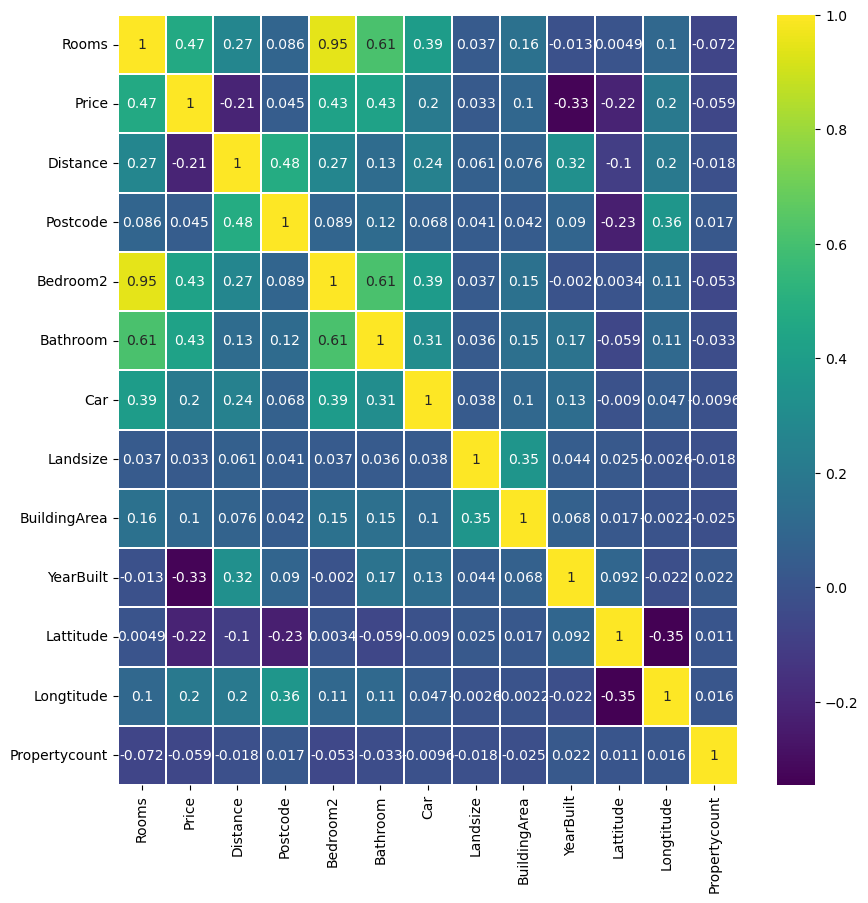

In [10]:
plt.figure(figsize=(10,10))
a=AA.corr()
sns.heatmap(a,cmap="viridis"  ,xticklabels=a.columns,
            yticklabels=a.columns,
            annot=True,
            linewidths=0.3)

#price strongly correlated with rooms, bedroom2,bathroom
#bedroom2 strongly correlated with rooms, bathroom, price
#bathroom strongly correlated with bedroom2,rooms, price
#car semi strongly correlated with rooms,bedroom2
#landsize semi strongly correlated with building area
#buildingarea semi strongly correlated with landsize
#yearbuilt semi strongly correlated with distance
#lattitude semi strongly correlated with postcode, longtitude
#longtitude semi strongly correlated with postcode, lattitude

In [11]:
AA2 = AA.copy()
column = [ 'Price', 'Rooms','Bedroom2','Bathroom']
X = AA2[column]
X


,Price,Rooms,Bedroom2,Bathroom
0,NaN,2,2.0,1.0
1,1480000.0,2,2.0,1.0
2,1035000.0,2,2.0,1.0
3,NaN,3,3.0,2.0
4,1465000.0,3,3.0,2.0
...,...,...,...,...
34851,1480000.0,4,4.0,1.0
34852,888000.0,2,2.0,2.0
34853,705000.0,2,2.0,1.0
34854,1140000.0,3,NaN,NaN


In [12]:
datafill1 = IterativeImputer(max_iter=100)
Y=datafill1.fit_transform(X)
tempdf = pd.DataFrame(Y, columns = ['Price','Rooms','Bedroom2','Bathroom'])

In [13]:
tempdf.isnull().sum()
AA2.update(tempdf)
AA2.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             1
Bathroom             1
Car               8725
Landsize         11807
BuildingArea     21112
YearBuilt        19303
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

In [14]:
AA2[AA2['Bathroom'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34854,Yarraville,12/37 Stephen St,3.0,h,1140000.0,SP,hockingstuart,24/2/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [15]:
AA2.dropna(subset=['Bathroom'], inplace = True)

In [16]:
AA2.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car               8724
Landsize         11806
BuildingArea     21111
YearBuilt        19302
CouncilArea          0
Lattitude         7972
Longtitude        7972
Regionname           0
Propertycount        0
dtype: int64

In [26]:
column = [ 'Car','Rooms','Bedroom2']
X = AA2[column]
datafill2 = KNNImputer(n_neighbors=5)
Z=datafill2.fit_transform(X)
tempdf2 = pd.DataFrame(Z, columns = ['Car','Rooms','Bedroom2'])


In [18]:
column = [ 'BuildingArea','Landsize']
X = AA2[column]
datafill3 = KNNImputer(n_neighbors=5)
T=datafill3.fit_transform(X)
tempdf3 = pd.DataFrame(T, columns = ['BuildingArea','Landsize'])


In [19]:
AA2.update(tempdf2)
AA2.update(tempdf3)
AA2.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19302
CouncilArea          0
Lattitude         7972
Longtitude        7972
Regionname           0
Propertycount        0
dtype: int64

In [20]:
column = [ 'Lattitude','Longtitude','Postcode']
X = AA2[column]
datafill4 = KNNImputer(n_neighbors=5)
S=datafill4.fit_transform(X)
tempdf4 = pd.DataFrame(S, columns = ['Lattitude','Longtitude','Postcode'])

In [21]:
AA2.update(tempdf4)

In [27]:
AA2.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [23]:
datafill5 = AA2['YearBuilt'].fillna(method= "bfill",inplace=False)
datafill5 =pd.DataFrame(datafill5,columns=['YearBuilt'])
AA2.update(datafill5)
AA2.isnull().sum()
AA2


In [29]:
AA2['Price'] = AA2['Price'].round(2)
AA2['Bedroom2'] = AA2['Bedroom2'].round(0)
AA2['Bathroom'] = AA2['Bathroom'].round(0)
AA2['Car'] = AA2['Car'].round(0)
AA2['Landsize'] = AA2['Landsize'].round(1)
AA2['BuildingArea'] = AA2['BuildingArea'].round(1)


In [30]:
AA2.to_csv(r'C:\Users\User\Downloads\casestudy.csv', index=False)